# Problem Statement

A classic problem in the field of pattern recognition is that of handwritten digit recognition. Suppose that you have images of handwritten digits ranging from 0-9 written by various people in boxes of a specific size - similar to the application forms in banks and universities.

 

The goal is to develop a model that can correctly identify the digit (between 0-9) written in an image. 

# Objective

You are required to develop a model using Support Vector Machine which should correctly classify the handwritten digits from 0-9 based on the pixel values given as features. Thus, this is a 10-class classification problem. 

In [1]:
#Importing Required Libraries for building the model

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Data
digit_data_full = pd.read_csv("C://Vikas//DS-UPGRAD-IIITB-2018-2019//Python//Support Vector Machine//Assignment//digit-recognizer//train.csv", sep = ',')

In [3]:
digit_data_full.head() #Viewing first few rows of the dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
digit_data_full.columns #Checking columns in the dataframe

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
# data types
print(digit_data_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


In [6]:
# dimensions of the dataframe(rows and columns)
digit_data_full.shape

(42000, 785)

In [7]:
digit_data_full.isnull().values.any() #Checking for NULL or NaN values in the dataset

False

In [8]:
#Only shows the columns which have NULL or NaN values
print(round(100*(digit_data_full.loc[:, digit_data_full.isnull().any()].isnull().sum())/len(digit_data_full.index), 2))

Series([], dtype: float64)


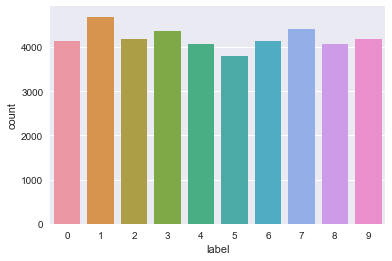

In [9]:
#Plotting of the frequency of digits in the dataframe
sns.set(style="darkgrid")
ax = sns.countplot(x="label", data=digit_data_full)

In [10]:
order = list(np.sort(digit_data_full['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [11]:
label_means = digit_data_full.groupby('label').mean()
label_means

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.846626,0.939105,0.397182,0.086344,0.118155,0.027267,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


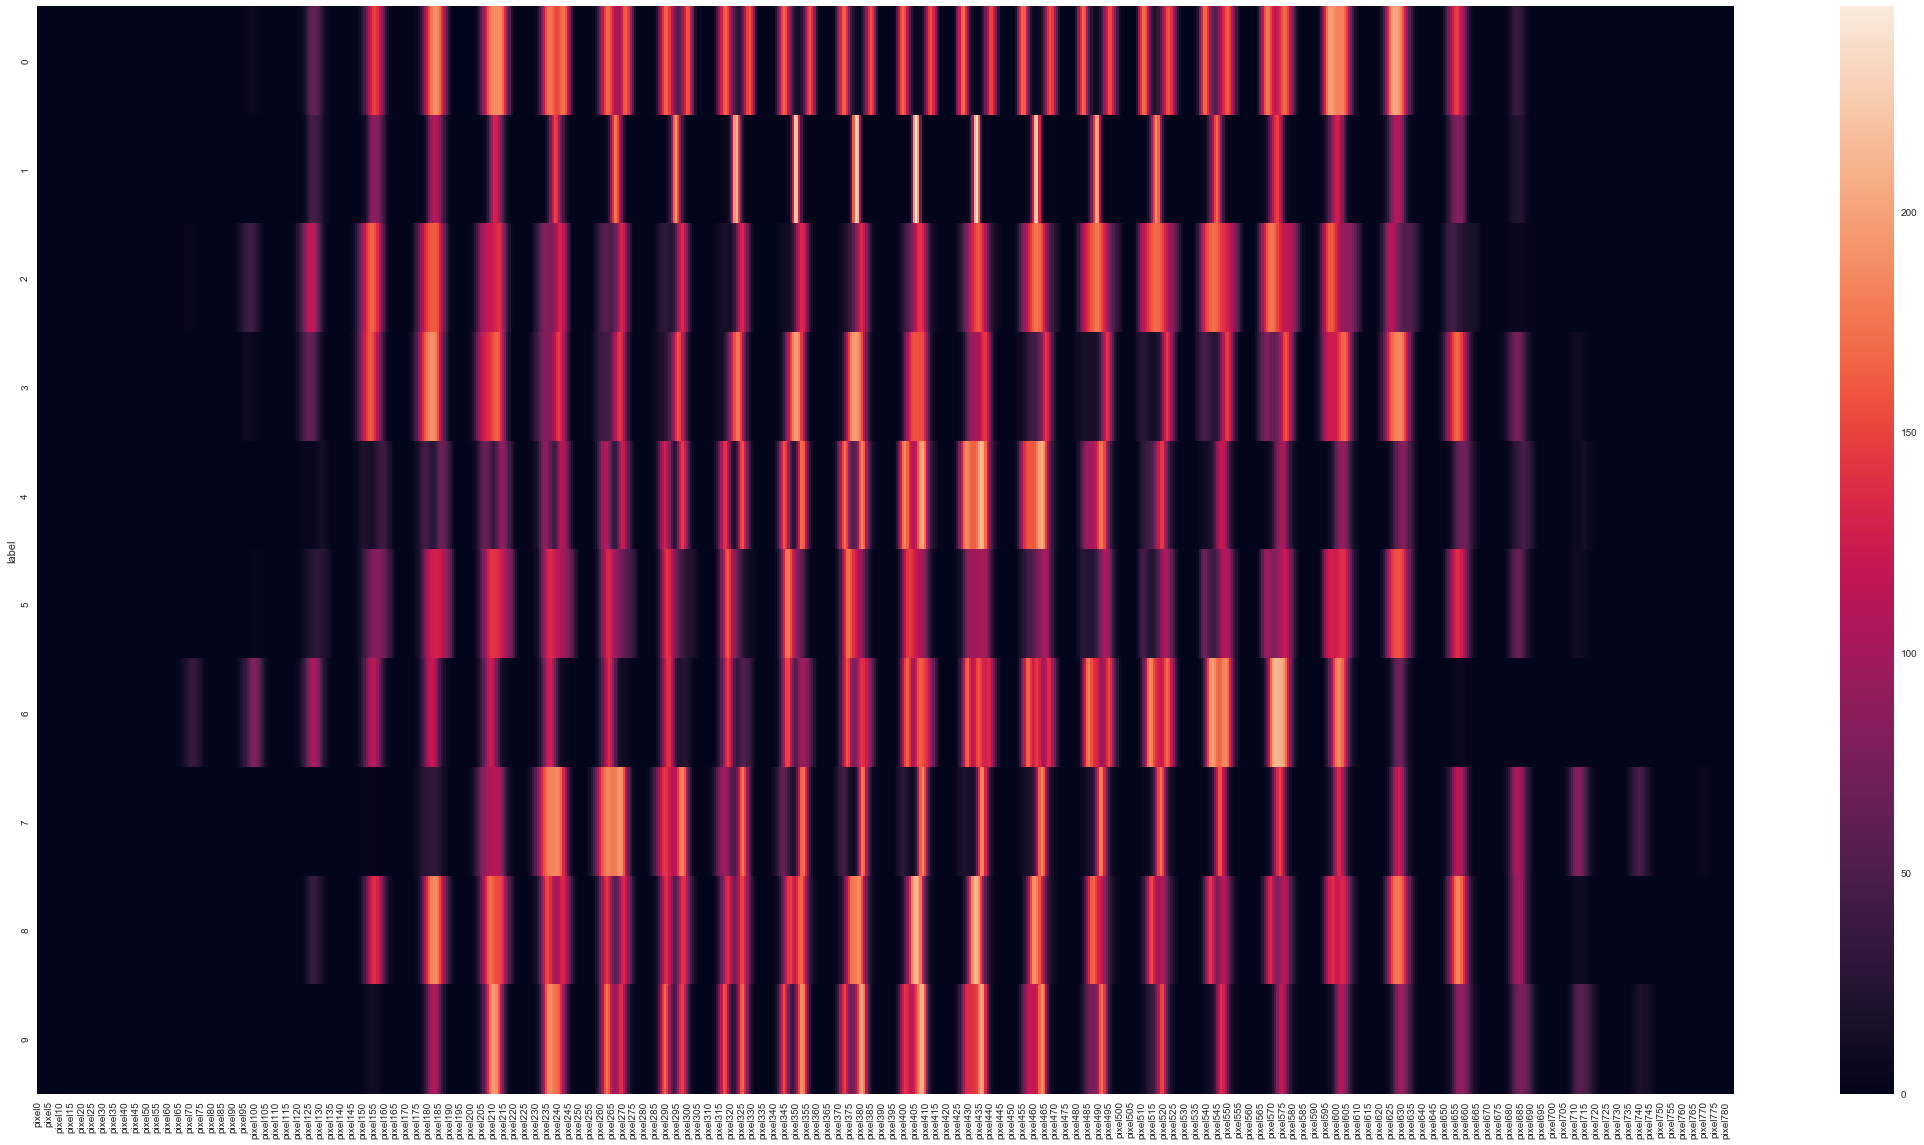

In [12]:
plt.figure(figsize=(38,20))
sns.heatmap(label_means)

# Extracting 20% of the data from the dataframe digit_data_full for using as dataframe for the Digit Recognition

In [13]:
digit_reco = digit_data_full.sample(frac=0.2, random_state = 101)

In [14]:
digit_reco.shape #Verifying Dimensions on new dataframe

(8400, 785)

In [15]:
digit_reco.head() #Viewing first few rows of the new dataframe

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
20209,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7136,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22572,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
digit_reco.columns #Verifying columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [17]:
digit_reco.isnull().values.any() #Reverifying for NULL or NaN values in new dataframe

False

In [18]:
order_in_digits = list(np.sort(digit_reco['label'].unique()))
print(order_in_digits)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


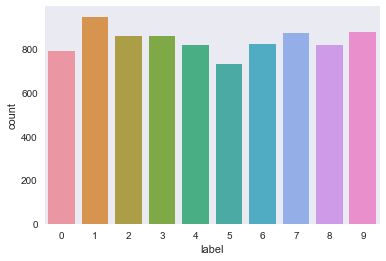

In [19]:
#Plotting of the frequency of digits in the dataframe
sns.set(style="dark")
ax = sns.countplot(x="label", data=digit_reco)

In [20]:
# average feature values
round(digit_reco.drop('label', axis=1).mean(), 2)

pixel0      0.00
pixel1      0.00
pixel2      0.00
pixel3      0.00
pixel4      0.00
pixel5      0.00
pixel6      0.00
pixel7      0.00
pixel8      0.00
pixel9      0.00
pixel10     0.00
pixel11     0.00
pixel12     0.00
pixel13     0.00
pixel14     0.00
pixel15     0.00
pixel16     0.00
pixel17     0.00
pixel18     0.00
pixel19     0.00
pixel20     0.00
pixel21     0.00
pixel22     0.00
pixel23     0.00
pixel24     0.00
pixel25     0.00
pixel26     0.00
pixel27     0.00
pixel28     0.00
pixel29     0.00
            ... 
pixel754    0.00
pixel755    0.00
pixel756    0.00
pixel757    0.00
pixel758    0.00
pixel759    0.00
pixel760    0.00
pixel761    0.02
pixel762    0.05
pixel763    0.10
pixel764    0.13
pixel765    0.14
pixel766    0.29
pixel767    0.49
pixel768    0.51
pixel769    0.38
pixel770    0.59
pixel771    0.69
pixel772    0.54
pixel773    0.32
pixel774    0.24
pixel775    0.16
pixel776    0.07
pixel777    0.04
pixel778    0.04
pixel779    0.01
pixel780    0.00
pixel781    0.

In [21]:
digit_reco.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,8400.000000,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,...,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.0,8400.0,8400.0,8400.0
mean,4.486667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.238810,0.155833,0.067857,0.044286,0.035000,0.007381,0.0,0.0,0.0,0.0
std,2.895006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.838875,5.303965,3.647775,2.920088,2.717516,0.676475,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,252.000000,253.000000,244.000000,62.000000,0.0,0.0,0.0,0.0


In [22]:
digit_reco.reset_index(inplace = True)

In [23]:
digit_reco.head()

,index,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,20209,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7136,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,17339,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,37117,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22572,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting digit_reco dataframe created above for 20% data into X and y dataframes

In [24]:
X = digit_reco.drop('label', axis = 1)
y = digit_reco['label']

In [25]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# Scaling the features
Scaling the features of X_train and X_test separately as model should not learn the values in X_test if we scale them together.

In [26]:
X_train = scale(X_train)
X_test = scale(X_test)

In [27]:
X_train

array([[ 0.66375893,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.04480366,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.97475112,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.06360423,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.58149236,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.86369884,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [28]:
X_test

array([[ 0.77979326,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.55875534,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.73647364,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.37503189,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.27384563,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.47721356,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

# Model Building
To start with let us build both Linear and Non-Linear Model and compare the accuracies.

In [29]:
# Using linear model initally

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [30]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9055555555555556 

[[215   0   1   1   0   3   1   0   0   0]
 [  0 274   0   1   2   1   0   0   3   0]
 [  3   1 232   5   5   1   4   3   2   0]
 [  0   1   4 239   1   9   0   1   4   3]
 [  0   1   3   0 226   2   1   0   0  13]
 [  3   1   2  11   1 183   5   0  10   0]
 [  4   0   3   0   3   1 244   0   0   0]
 [  1   4   4   3   5   2   0 240   0  10]
 [  4   8   7  12   0   6   1   4 198   2]
 [  3   0   0   5  10   3   0  18   2 231]]


In [31]:
# Using non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [32]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9333333333333333 

[[213   0   2   0   0   1   3   0   2   0]
 [  0 270   2   1   3   2   1   1   1   0]
 [  2   0 241   3   3   1   2   3   1   0]
 [  0   1   7 244   0   3   0   3   1   3]
 [  0   0   1   0 236   1   0   3   0   5]
 [  2   0   3   6   0 200   3   0   2   0]
 [  3   0   3   0   0   1 248   0   0   0]
 [  0   2   8   1   5   1   0 245   0   7]
 [  1   4   4   6   0   5   1   2 217   2]
 [  1   0   6   4   3   2   0  16   2 238]]


# Grid Search: Hyperparameter Tuning

Tuning the model to find the optimal values of C and gamma corresponding to an RBF kernel. 

Using 5-fold cross validation.

In [33]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs=-1) 

#Added parameter n_jobs=-1 for parallel processing so that the GridSearchCV executes in lesser time

# fit the model
model_cv.fit(X_train, y_train)   

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 21.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [34]:
#Cross-Validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,98.011374,0.296474,11.531591,0.372269,1,0.01,"{'C': 1, 'gamma': 0.01}",0.704932,0.730442,0.715136,...,0.719388,0.008705,12,1.000000,1.000000,0.999787,0.999787,0.999787,0.999872,0.000104
1,25.511303,2.582939,7.905156,0.550105,1,0.001,"{'C': 1, 'gamma': 0.001}",0.926871,0.937075,0.913265,...,0.929422,0.008804,4,0.974702,0.976828,0.975128,0.975765,0.975128,0.975510,0.000741
2,45.320585,2.153785,10.619390,1.049183,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.890306,0.903912,0.882653,...,0.896599,0.008682,8,0.911777,0.910289,0.913690,0.907313,0.911990,0.911012,0.002141
3,78.935786,1.097663,8.869666,0.099562,10,0.01,"{'C': 10, 'gamma': 0.01}",0.724490,0.747449,0.735544,...,0.738095,0.007849,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,18.250426,0.493212,5.196079,0.305423,10,0.001,"{'C': 10, 'gamma': 0.001}",0.929422,0.944728,0.926871,...,0.937585,0.008131,1,0.999362,0.999787,0.999575,0.999150,0.999575,0.999490,0.000217
5,17.568281,1.997401,6.016878,0.889976,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.920918,0.934524,0.907313,...,0.924830,0.010027,7,0.967049,0.968537,0.966624,0.964923,0.965986,0.966624,0.001195
6,109.380105,12.901877,9.605126,0.202087,100,0.01,"{'C': 100, 'gamma': 0.01}",0.724490,0.747449,0.735544,...,0.738095,0.007849,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,19.826846,0.577406,5.446187,0.206048,100,0.001,"{'C': 100, 'gamma': 0.001}",0.928571,0.943878,0.925170,...,0.936565,0.008220,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,13.216001,1.339966,4.846631,0.596616,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.930272,0.934524,0.915816,...,0.928571,0.008138,5,0.995748,0.995961,0.995748,0.995748,0.997024,0.996046,0.000496
9,94.254909,1.762072,11.410578,0.930849,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.724490,0.747449,0.735544,...,0.738095,0.007849,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


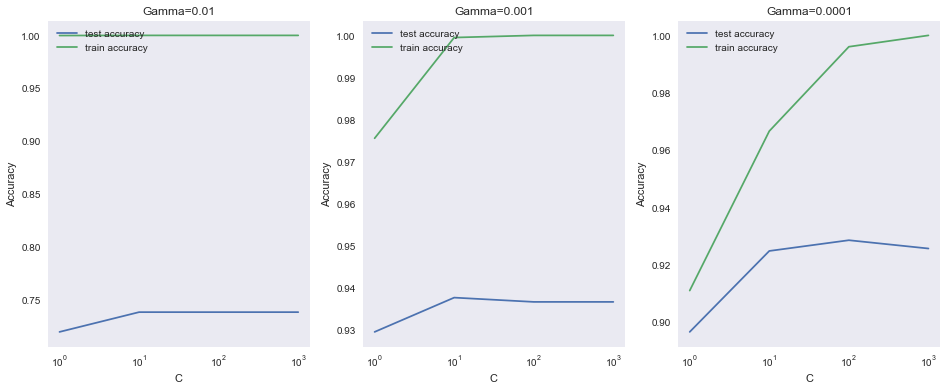

In [35]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
#plt.ylim([0.60, 1])  #Commenting this as train accuracy should show within graph and y-axis is defined dynamically
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
#plt.ylim([0.60, 1]) #Commenting this as train accuracy should show within graph and y-axis is defined dynamically
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
#plt.ylim([0.60, 1]) #Commenting this as train accuracy should show within graph and y-axis is defined dynamically
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

With the above analysis, we can see that the problem and the data is **inherently non-linear** in nature, and a complex model is showing better performance than simple, linear models in this case.

In [36]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9375850340136055 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


# Building and Evaluating the Final Model

Now we build and evaluate the final model, i.e. with best C and gamma value identified above to get the highest accuracy

In [37]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9365079365079365 

[[216   0   1   0   0   1   2   0   1   0]
 [  0 270   2   2   3   1   1   1   1   0]
 [  3   0 240   4   3   1   2   2   1   0]
 [  0   1   6 243   1   4   0   2   2   3]
 [  0   0   1   0 234   1   2   3   0   5]
 [  0   0   3   5   0 203   2   0   3   0]
 [  3   0   5   0   0   0 247   0   0   0]
 [  0   1   7   2   4   0   0 246   1   8]
 [  1   3   3   7   0   6   0   1 219   2]
 [  1   0   5   5   0   4   0  14   1 242]] 



# Thus we get 93.65%(~94%) accuracy using the non-linear model as rbf with as gamma as 0.001 and C=10